## Analyzing problem regimes for (1D Logistic Growth ODE)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Understanding the Logistic Growth Curve Across ρ Values

To guide our PINN training setup, we first visualize how the **logistic growth solution** changes with different values of ρ:

$$
\frac{du}{dt} = \rho \cdot u \cdot (1 - u), \quad u(0) = u_0
$$

Its analytical solution is:

$$
u(t) = \frac{u_0 \cdot e^{\rho t}}{1 + u_0 \cdot \left(e^{\rho t} - 1\right)}
$$

This helps us:
- Identify **qualitative regimes** (slow, moderate, fast growth).
- Choose a **representative ρ interval** for training.
- Decide how many ρ points are needed to capture the diversity of dynamics.

Below, we plot the solution $u(t)$ for a range of ρ values, using $u_0 = 0.1$ and $t \in [0, 1]$.

In [2]:
def logistic_solution(t, rho, u0=0.1):
    return u0 * np.exp(rho * t) / (1 + u0 * (np.exp(rho * t) - 1))

t = np.linspace(0, 1, 200)
rho_groups = {
    "Low (slow growth)": [0.1, 0.3, 0.5],
    "Medium (balanced growth)": [1.0, 2.0, 3.0],
    "High (fast/stiff growth)": [5.0, 10.0, 20.0],
}

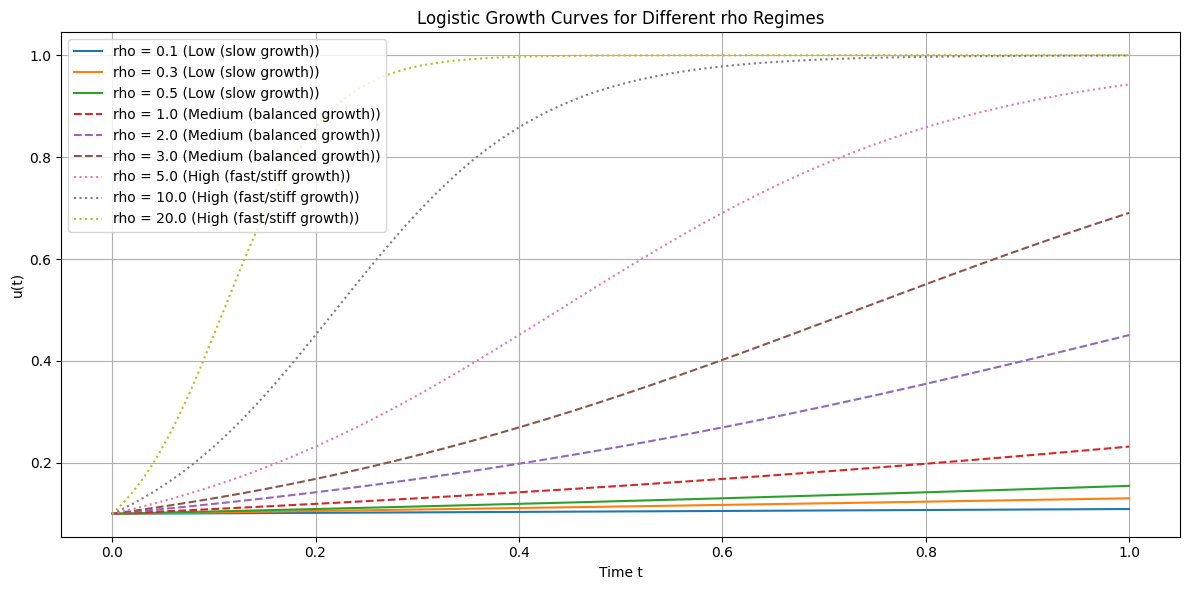

In [3]:
# Distinct line styles for each regime
line_styles = {
    "Low (slow growth)": 'solid',
    "Medium (balanced growth)": 'dashed',
    "High (fast/stiff growth)": 'dotted'
}


plt.figure(figsize=(12, 6))

for label, rho_vals in rho_groups.items():
    style = line_styles[label]
    for rho in rho_vals:
        u = logistic_solution(t, rho)
        plt.plot(t, u, linestyle=style, label=f"rho = {rho} ({label})")

plt.title("Logistic Growth Curves for Different rho Regimes")
plt.xlabel("Time t")
plt.ylabel("u(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Regime Interpretation

- **Low ρ (< 0.5)**: Very slow growth, almost linear in [0, 1].
- **Moderate ρ (0.5 – 3.0)**: Noticeable S-shape with visible transition.
- **High ρ (> 5)**: Almost a step function — solution saturates very early ⇒ difficult for neural networks to approximate due to stiffness.

### Training Range Selection

Based on this, a **moderate ρ range (e.g., 0.5 – 3.0)** gives:
- Smooth transition curves,
- Good coverage of dynamic regimes,
- Still learnable without high stiffness.

Current training range `[0.5–1.0]` covers only the **mildest part** of the regime — not representative of more dynamic or challenging regions.

We propose testing on:
- **ρ range:** `[0.5, 3.0]` (or `[0.5, 4.0]`)
- **Number of ρ values:** Start with 5–10 points (uniform), then evaluate interpolation generalization.

This setup ensures the model learns across **transient, accelerating, and stabilizing** growth patterns.